### CS 4820
# Lab 3: More on Keras

### 0. Dataset

We are going to use the same `circles` dataset that we've seen before.

In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses");

### 1. Keras

[Keras](https://keras.io/) is the Deep Learning model definition API we will use throughout the course. It's modular, well designed, and it has been integrated by both Google and Microsoft to serve as the high-level API for their Deep Learning libraries (if you are not familiar with APIs, you may have a look on [Wikipedia](https://en.wikipedia.org/wiki/Application_programming_interface)).

As explained earlier, [Tensorflow](https://www.tensorflow.org/) adopted Keras as the default model specification API starting from the recent 2.0 release. For this reason, we decided to use its syntax throughout the course.

> TIP: Do not worry about understanding every line of code of what follows. The rest of the course walks you through how to use Keras and [Tensorflow](https://www.tensorflow.org/) (the most popular open-source Deep Learning library, developed by Google), and so I'm not going to explain every detail here.
> Here we're going to demonstrate an overview of _how_ to use Keras, and we'll describe more features as the course progresses.

To train a model to tell the difference between red crosses and blue dots above, we have to perform the following steps:

1. Define our Neural Network structure; this is going to be our model.
2. Train the model on our data.
3. Check that the model has correctly learned to separate the red crosses from the blue dots.

> TIP: we will repeat these steps many times throughout the class, and we'll have plenty of opportunities to familiarize ourselves with them.

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10);

Epoch 1/10
1000/1000 [==============================] - 1s 527us/sample - loss: 0.6813 - accuracy: 0.6420
Epoch 2/10
1000/1000 [==============================] - 0s 98us/sample - loss: 0.5898 - accuracy: 0.7560
Epoch 3/10
1000/1000 [==============================] - 0s 96us/sample - loss: 0.4654 - accuracy: 0.9040
Epoch 4/10
1000/1000 [==============================] - 0s 131us/sample - loss: 0.3438 - accuracy: 0.9590
Epoch 5/10
1000/1000 [==============================] - 0s 135us/sample - loss: 0.2486 - accuracy: 0.9990
Epoch 6/10
1000/1000 [==============================] - 0s 91us/sample - loss: 0.1882 - accuracy: 1.0000
Epoch 7/10
1000/1000 [==============================] - 0s 102us/sample - loss: 0.1460 - accuracy: 1.0000
Epoch 8/10
1000/1000 [==============================] - 0s 98us/sample - loss: 0.1175 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 0s 91us/sample - loss: 0.0974 - accuracy: 1.0000
Epoch 10/10
1000/1000 [============================

### 2. Decision Boundary

Now that our model is well trained, we can feed it with any pair of numbers and it will generate a prediction for the probability that a point situated on the 2D plane at those coordinates belongs to the group of red crosses. 

In other words, now that we have a trained model, we can ask for the probability to be in the group of "red crosses" for any point in the 2D plane. This is great because we can see if it has correctly learned to draw a boundary between red crosses and blue dots. One way to calculate this is to define a grid on the 2D plane and calculate the probability predicted by the model for any point on this grid. Let's do it.

> TIP: Don't worry if you don't yet understand everything in the following code. It is ok if you get a general idea.

In [3]:
def plot_decision_boundary(model, X, y):
    hticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    vticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(7, 7))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

    plt.title("Blue circles and Red crosses");

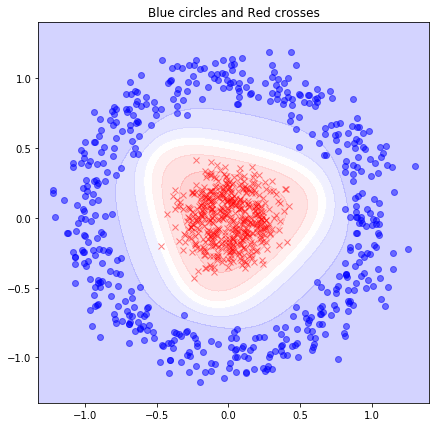

In [8]:
plot_decision_boundary(model, X, y)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)